In [41]:
%matplotlib inline
    
def get_pointed(i,j,matrix_i,matrix_j,longstring,shortstring,aligned_long,aligned_short,i_last,j_last,the_golden_path_x,the_golden_path_y):
    #print i,j,int(matrix_i[i][j]), int(matrix_j[i][j]),i_last,j_last
    try:
        if i == i_last:
            aligned_long += '-'
        else:
            aligned_long += longstring[i]
    except:
        aligned_long += '-'
    try:
        if j == j_last:
            aligned_short += '-'
        else:
            aligned_short += shortstring[j]
    except:
        aligned_short += '-'

    if i == 0 and j == 0:
        try:
            if i == i_last:
                aligned_long += '-'
            else:
                aligned_long += longstring[i]
        except:
            aligned_long += '-'
        try:
            if j == j_last:
                aligned_short += '-'
            else:
                aligned_short += shortstring[j]
        except:
            aligned_short += '-'
        return aligned_long, aligned_short, the_golden_path_x,the_golden_path_y
    else:
        i_last,j_last = i, j
        i, j = int(matrix_i[i][j]), int(matrix_j[i][j])
        the_golden_path_x = the_golden_path_x + [i_last]
        the_golden_path_y = the_golden_path_y + [j_last]
        return get_pointed(i,j,matrix_i,matrix_j,longstring,shortstring,aligned_long,aligned_short,i_last,j_last,the_golden_path_x,the_golden_path_y)

def needlemanwunsch(string1,string2,fulloutput=True):
    import numpy as np
    import matplotlib.pyplot as plt

    aa_index = {'C': 0, 'S': 1, 'T': 2, 'P': 3, 'A': 4, 'G': 5, 'N': 6, 'D': 7
               , 'E': 8, 'Q': 9, 'H': 10, 'R': 11, 'K': 12, 'M': 13, 'I': 14, 'L': 15
               , 'V': 16, 'F': 17, 'Y': 18, 'W': 19}
    substituion_matrix = np.array([ [9]
                       ,[-1, 4]
                       ,[-1, 1, 5]

                       ,[-3,-1,-1, 7]
                       ,[ 0, 1, 0,-1, 4]
                       ,[-3, 0,-2,-2, 0, 6]

                       ,[-3, 1, 0,-2,-2, 0, 6]                   
                       ,[-3, 0,-1,-1,-2,-1, 1, 6]
                       ,[-4, 0,-1,-1,-1,-2, 0, 2, 5]
                       ,[-3, 0,-1,-1,-1,-2, 0, 0, 2, 5]

                       ,[-3,-1,-2,-2,-2,-2, 1,-1, 0, 0, 8]
                       ,[-3,-1,-1,-2,-1,-2, 0,-2, 0, 1, 0, 5]
                       ,[-3, 0,-1,-1,-1,-2, 0,-1, 1, 1,-1, 2, 5]

                       ,[-1,-1,-1,-2,-1,-3,-2,-3,-2, 0,-2,-1,-1, 5]
                       ,[-1,-2,-1,-3,-1,-4,-3,-3,-3,-3,-3,-3,-3, 1, 4]                   
                       ,[-1,-2,-1,-3,-1,-4,-3,-4,-3,-2,-3,-2,-2, 2, 2, 4]
                       ,[-1,-2, 0,-2, 0,-3,-3,-3,-2,-2,-3, 3, 2, 1, 3, 1, 4]

                       ,[-2,-2,-2,-4,-2,-3,-3,-3,-3,-3,-1,-3,-3, 0, 0, 0,-1, 6]
                       ,[-2,-2,-2,-3,-2,-3,-2,-3,-2,-1, 2,-2,-2,-1,-1,-1,-1, 3, 7]
                       ,[-2,-3,-2,-4,-3,-2,-4,-4,-3,-2,-2,-3,-3,-1,-3,-2,-3, 1, 2,11]])

    score = 0
    #print '------------', aa_index[string2[0]],string2[0], substituion_matrix[1][3]
    if len(string1) > len(string2):
        longstring = string1
        shortstring = string2
    else:
        longstring = string2
        shortstring = string1
    
    score_matrix = np.zeros((len(longstring)+1,len(shortstring)+1))
    linear_gap_penalty = -5
    for i in range(0,len(longstring)+1):
        score_matrix[i,0] = linear_gap_penalty*i
    for j in range(0,len(shortstring)+1):
        score_matrix[0,j] = linear_gap_penalty*j
    pointer_matrix_i = np.zeros((len(longstring)+1,len(shortstring)+1))
    pointer_matrix_j = np.zeros((len(longstring)+1,len(shortstring)+1))
    for i in range(0,len(shortstring)+1):
        pointer_matrix_j[0][i]=i-1
    for i in range(0,len(longstring)+1):
        pointer_matrix_i[i][0]=i-1
    pointer_matrix_i[0,0] = 0
    pointer_matrix_j[0,0] = 0
    for i in range(1,len(longstring)+1):
        for j in range(1,len(shortstring)+1):
            if aa_index[longstring[i-1]] > aa_index[shortstring[j-1]]:
                diagonal = score_matrix[i-1,j-1] + int(substituion_matrix[int(aa_index[longstring[i-1]])][int(aa_index[shortstring[j-1]])])
            else:
                diagonal = score_matrix[i-1,j-1] + int(substituion_matrix[int(aa_index[shortstring[j-1]])][int(aa_index[longstring[i-1]])])
            indel1 = score_matrix[i-1,j] + linear_gap_penalty
            indel2 = score_matrix[i,j-1] + linear_gap_penalty
            options = {1:diagonal,2:indel1,3:indel2}
            invoptions=dict((v,k) for k , v in options.items())
            #print i,j,int(substituion_matrix[int(aa_index[string1[i-1]])][0]), diagonal
            score_matrix[i,j] = np.max([diagonal,indel1,indel2])
            if invoptions[score_matrix[i,j]] == 1:
                pointer_matrix_i[i,j] = i-1
                pointer_matrix_j[i,j] = j-1
            elif invoptions[score_matrix[i,j]] == 2:
                pointer_matrix_i[i,j] = i-1
                pointer_matrix_j[i,j] = j
            else:
                pointer_matrix_i[i,j] = i
                pointer_matrix_j[i,j] = j-1
    ######traceback#######
    #locate_max
    #print 'maxindex', maxindex
    max_col_pos = np.argmax(score_matrix[-1:])
    #print max_row_pos
    max_row_pos = np.argmax(score_matrix.transpose()[-1:])
    #print max_col_pos
    #print score_matrix[max_row_pos,max_col_pos]
    ####### locate source cell ######
    next_i = int(max_row_pos)
    next_j = int(max_col_pos)
    #print next_j, pointer_matrix_j
    #print next_i, pointer_matrix_i[next_i][next_j]
    #print next_j, pointer_matrix_j[next_i][next_j]
    aligned_string_long = ''
    aligned_string_short = ''
    aligned_long,aligned_short,the_golden_path_x,the_golden_path_y= get_pointed(next_i,next_j,pointer_matrix_i,pointer_matrix_j,longstring,shortstring,'','',0,0,[],[])
    print aligned_long[::-1]
    print aligned_short[::-1]
    #print 'asdf',pointer_matrix_i.transpose()
    #print pointer_matrix_j.transpose()
    

    print score_matrix#, pointer_matrix_i,pointer_matrix_j
    plt.imshow(score_matrix,cmap="magma",vmin=int(np.min(np.min(score_matrix))), vmax=int(np.max(np.max(score_matrix))),interpolation='none')
    #plt.imshow(pointer_matrix,cmap="seismic_r",vmin=int(np.min(np.min(pointer_matrix))), vmax=int(np.max(np.max(pointer_matrix))),interpolation='none')
    x_s = np.zeros((np.size(pointer_matrix_i)))
    y_s = np.zeros((np.size(pointer_matrix_i)))
    for i in range(0,len(pointer_matrix_i)):
        for j in range(0,len(pointer_matrix_i[0])):
            y_s = [pointer_matrix_i[i,j], i]
            x_s = [pointer_matrix_j[i,j], j]
            score_range = np.max(score_matrix)-np.min(score_matrix)
            plt.plot(x_s,y_s,linewidth=(score_matrix[i,j]-np.min(score_matrix))*5./score_range,color='grey')
    #plt.rcParams['figure.figsize'] = 20,20
    plt.plot(the_golden_path_y,the_golden_path_x,linewidth=5,color='w')
    plt.yticks( np.arange(1,len(longstring)+1), list(longstring) )
    plt.xticks( np.arange(1,len(shortstring)+1), list(shortstring) )
    plt.show()
    return score

IIS-ALIGNED
TTHISLI-NE-
[[  0.  -5. -10. -15. -20. -25. -30. -35. -40.]
 [ -5.  -1.  -6.  -6. -11. -16. -21. -26. -31.]
 [-10.  -4.  -2.  -7.  -2.  -7. -12. -17. -22.]
 [-15.  -9.  -6.  -3.  -6.  -3.  -8. -13. -18.]
 [-20. -14. -11.  -4.  -5.  -2.  -1.  -6. -11.]
 [-25. -19. -16.  -7.  -6.  -3.   2.  -3.  -8.]
 [-30. -24. -21. -12.  -7.  -8.  -3.   2.  -3.]
 [-35. -29. -23. -17. -11. -10.  -8.   3.   2.]
 [-40. -34. -28. -22. -16. -14. -13.  -2.   8.]
 [-45. -39. -33. -27. -21. -19. -17.  -7.   3.]]


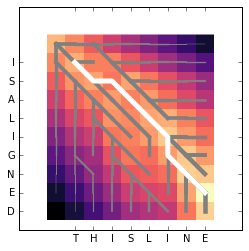

In [42]:
human_heavychain_fragment = 'THISLINE'
macac_heavychain_fragment = 'ISALIGNED'

human_versus_monkey = needlemanwunsch(human_heavychain_fragment,macac_heavychain_fragment,fulloutput=False)

## 

---THISPPPLINEPPPPPPPISPPPPPPALIGNEDPPP
WWWTHISW--LINEW------ISW-----ALIGNEDWW-
[[   0.   -5.  -10.  -15.  -20.  -25.  -30.  -35.  -40.  -45.  -50.  -55.
   -60.  -65.  -70.  -75.  -80.  -85.  -90.  -95. -100. -105. -110. -115.
  -120.]
 [  -5.   -2.   -7.   -5.  -10.  -15.  -20.  -25.  -30.  -35.  -40.  -45.
   -50.  -55.  -60.  -65.  -70.  -75.  -80.  -85.  -90.  -95. -100. -105.
  -110.]
 [ -10.   -7.   -4.   -9.    3.   -2.   -7.  -12.  -17.  -22.  -27.  -32.
   -37.  -42.  -47.  -52.  -57.  -62.  -67.  -72.  -77.  -82.  -87.  -92.
   -97.]
 [ -15.  -12.   -9.   -5.   -2.    7.    2.   -3.   -8.  -13.  -18.  -23.
   -28.  -33.  -38.  -43.  -48.  -53.  -58.  -63.  -68.  -73.  -78.  -83.
   -88.]
 [ -20.  -17.  -14.   -8.   -6.    2.   11.    6.    1.   -4.   -9.  -14.
   -19.  -24.  -29.  -34.  -39.  -44.  -49.  -54.  -59.  -64.  -69.  -74.
   -79.]
 [ -25.  -22.  -19.  -13.  -10.   -3.    6.    7.    3.   -2.   -6.  -10.
   -15.  -20.  -25.  -30.  -35.  -40.  -45.  -50.  -55.  -60.

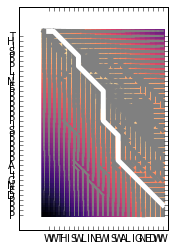

In [43]:
eg1 = 'THISPPPLINEPPPPPPPISPPPPPPALIGNEDPPPP'
eg2 = 'WWTHISWLINEWISWALIGNEDWW'


human_versus_monkey = needlemanwunsch(eg1,eg2,fulloutput=False)

In [290]:
def build_dict(dataset):
    return dict((item,) for item in dataset)

In [28]:
%matplotlib inline
def get_pointed(i,j,matrix_i,matrix_j,longstring,shortstring,aligned_long,aligned_short,i_last,j_last,the_golden_path_x,the_golden_path_y):
    #print i,j,int(matrix_i[i][j]), int(matrix_j[i][j]),i_last,j_last
    try:
        if i == i_last:
            aligned_long += '-'
        else:
            aligned_long += longstring[i]
    except:
        aligned_long += '-'
    try:
        if j == j_last:
            aligned_short += '-'
        else:
            aligned_short += shortstring[j]
    except:
        aligned_short += '-'

    if i == 0 and j == 0:
        try:
            if i == i_last:
                aligned_long += '-'
            else:
                aligned_long += longstring[i]
        except:
            aligned_long += '-'
        try:
            if j == j_last:
                aligned_short += '-'
            else:
                aligned_short += shortstring[j]
        except:
            aligned_short += '-'
        return aligned_long, aligned_short, the_golden_path_x,the_golden_path_y
    else:
        i_last,j_last = i, j
        i, j = int(matrix_i[i][j]), int(matrix_j[i][j])
        the_golden_path_x = the_golden_path_x + [i_last]
        the_golden_path_y = the_golden_path_y + [j_last]
        return get_pointed(i,j,matrix_i,matrix_j,longstring,shortstring,aligned_long,aligned_short,i_last,j_last,the_golden_path_x,the_golden_path_y)

def smithwaterman(string1,string2,fulloutput=True):
    import numpy as np
    import matplotlib.pyplot as plt

    aa_index = {'C': 0, 'S': 1, 'T': 2, 'P': 3, 'A': 4, 'G': 5, 'N': 6, 'D': 7
               , 'E': 8, 'Q': 9, 'H': 10, 'R': 11, 'K': 12, 'M': 13, 'I': 14, 'L': 15
               , 'V': 16, 'F': 17, 'Y': 18, 'W': 19}
    substituion_matrix = np.array([ [9]
                       ,[-1, 4]
                       ,[-1, 1, 5]

                       ,[-3,-1,-1, 7]
                       ,[ 0, 1, 0,-1, 4]
                       ,[-3, 0,-2,-2, 0, 6]

                       ,[-3, 1, 0,-2,-2, 0, 6]                   
                       ,[-3, 0,-1,-1,-2,-1, 1, 6]
                       ,[-4, 0,-1,-1,-1,-2, 0, 2, 5]
                       ,[-3, 0,-1,-1,-1,-2, 0, 0, 2, 5]

                       ,[-3,-1,-2,-2,-2,-2, 1,-1, 0, 0, 8]
                       ,[-3,-1,-1,-2,-1,-2, 0,-2, 0, 1, 0, 5]
                       ,[-3, 0,-1,-1,-1,-2, 0,-1, 1, 1,-1, 2, 5]

                       ,[-1,-1,-1,-2,-1,-3,-2,-3,-2, 0,-2,-1,-1, 5]
                       ,[-1,-2,-1,-3,-1,-4,-3,-3,-3,-3,-3,-3,-3, 1, 4]                   
                       ,[-1,-2,-1,-3,-1,-4,-3,-4,-3,-2,-3,-2,-2, 2, 2, 4]
                       ,[-1,-2, 0,-2, 0,-3,-3,-3,-2,-2,-3, 3, 2, 1, 3, 1, 4]

                       ,[-2,-2,-2,-4,-2,-3,-3,-3,-3,-3,-1,-3,-3, 0, 0, 0,-1, 6]
                       ,[-2,-2,-2,-3,-2,-3,-2,-3,-2,-1, 2,-2,-2,-1,-1,-1,-1, 3, 7]
                       ,[-2,-3,-2,-4,-3,-2,-4,-4,-3,-2,-2,-3,-3,-1,-3,-2,-3, 1, 2,11]])

    score = 0
    #print '------------', aa_index[string2[0]],string2[0], substituion_matrix[1][3]
    if len(string1) > len(string2):
        longstring = string1
        shortstring = string2
    else:
        longstring = string2
        shortstring = string1
    
    score_matrix = np.zeros((len(longstring)+1,len(shortstring)+1))
    linear_gap_penalty = -2
    for i in range(0,len(longstring)+1):
        score_matrix[i,0] = 0*i
    for j in range(0,len(shortstring)+1):
        score_matrix[0,j] = 0*j
    pointer_matrix_i = np.zeros((len(longstring)+1,len(shortstring)+1))
    pointer_matrix_j = np.zeros((len(longstring)+1,len(shortstring)+1))
    for i in range(0,len(shortstring)+1):
        pointer_matrix_j[0][i]=i-1
    for i in range(0,len(longstring)+1):
        pointer_matrix_i[i][0]=i-1
    pointer_matrix_i[0,0] = 0
    pointer_matrix_j[0,0] = 0
    for i in range(1,len(longstring)+1):
        for j in range(1,len(shortstring)+1):
            if aa_index[longstring[i-1]] > aa_index[shortstring[j-1]]:
                diagonal = score_matrix[i-1,j-1] + int(substituion_matrix[int(aa_index[longstring[i-1]])][int(aa_index[shortstring[j-1]])])
            else:
                diagonal = score_matrix[i-1,j-1] + int(substituion_matrix[int(aa_index[shortstring[j-1]])][int(aa_index[longstring[i-1]])])
            if diagonal < 0:
                diagonal = 0
            indel1 = score_matrix[i-1,j] + linear_gap_penalty
            if indel1 < 0:
                indel1 = 0
            indel2 = score_matrix[i,j-1] + linear_gap_penalty
            if indel2 < 0:
                indel2 = 0
            options = {1:diagonal,2:indel1,3:indel2}
            invoptions=dict((v,k) for k , v in options.items())
            #print i,j,int(substituion_matrix[int(aa_index[string1[i-1]])][0]), diagonal
            score_matrix[i,j] = np.max([diagonal,indel1,indel2])
            if invoptions[score_matrix[i,j]] == 1:
                pointer_matrix_i[i,j] = i-1
                pointer_matrix_j[i,j] = j-1
            elif invoptions[score_matrix[i,j]] == 2:
                pointer_matrix_i[i,j] = i-1
                pointer_matrix_j[i,j] = j
            else:
                pointer_matrix_i[i,j] = i
                pointer_matrix_j[i,j] = j-1
    ######traceback#######
    #locate_max
    #print 'maxindex', maxindex
    max_col_pos = np.argmax(score_matrix[-1:])
    #print max_row_pos
    max_row_pos = np.argmax(score_matrix.transpose()[-1:])
    #print max_col_pos
    #print score_matrix[max_row_pos,max_col_pos]
    ####### locate source cell ######
    next_i = int(max_row_pos)
    next_j = int(max_col_pos)
    #print next_j, pointer_matrix_j
    #print next_i, pointer_matrix_i[next_i][next_j]
    #print next_j, pointer_matrix_j[next_i][next_j]
    aligned_string_long = ''
    aligned_string_short = ''
    aligned_long,aligned_short,the_golden_path_x,the_golden_path_y= get_pointed(next_i,next_j,pointer_matrix_i,pointer_matrix_j,longstring,shortstring,'','',0,0,[],[])
    print aligned_long[::-1]
    print aligned_short[::-1]
    #print 'asdf',pointer_matrix_i.transpose()
    #print pointer_matrix_j.transpose()
    

    print score_matrix#, pointer_matrix_i,pointer_matrix_j
    plt.imshow(score_matrix,cmap="magma",vmin=int(np.min(np.min(score_matrix))), vmax=int(np.max(np.max(score_matrix))),interpolation='none')
    #plt.imshow(pointer_matrix,cmap="seismic_r",vmin=int(np.min(np.min(pointer_matrix))), vmax=int(np.max(np.max(pointer_matrix))),interpolation='none')
    x_s = np.zeros((np.size(pointer_matrix_i)))
    y_s = np.zeros((np.size(pointer_matrix_i)))
    for i in range(0,len(pointer_matrix_i)):
        for j in range(0,len(pointer_matrix_i[0])):
            y_s = [pointer_matrix_i[i,j], i]
            x_s = [pointer_matrix_j[i,j], j]
            score_range = np.max(score_matrix)-np.min(score_matrix)
            plt.plot(x_s,y_s,linewidth=(score_matrix[i,j]-np.min(score_matrix))*5./score_range,color='grey')
    #plt.rcParams['figure.figsize'] = 20,20
    plt.plot(the_golden_path_y,the_golden_path_x,linewidth=5,color='w')
    plt.yticks( np.arange(1,len(longstring)+1), list(longstring) )
    plt.xticks( np.arange(1,len(shortstring)+1), list(shortstring) )
    plt.show()
    return score

---ISALIGNED
TTHIS-LI-NE-
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   4.   2.   2.   4.   2.   0.]
 [  0.   1.   0.   2.   8.   6.   4.   5.   3.]
 [  0.   0.   0.   0.   6.   7.   5.   3.   4.]
 [  0.   0.   0.   2.   4.  10.   9.   7.   5.]
 [  0.   0.   0.   4.   2.   8.  14.  12.  10.]
 [  0.   0.   0.   2.   4.   6.  12.  14.  12.]
 [  0.   0.   1.   0.   3.   4.  10.  18.  16.]
 [  0.   0.   0.   0.   1.   2.   8.  16.  23.]
 [  0.   0.   0.   0.   0.   0.   6.  14.  21.]]


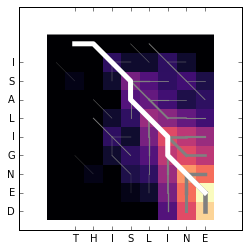

In [29]:
human_heavychain_fragment = 'THISLINE'
macac_heavychain_fragment = 'ISALIGNED'


human_versus_monkey = smithwaterman(human_heavychain_fragment,macac_heavychain_fragment,fulloutput=False)

---------THISPPP-LINEPPPPPPP-ISPPPPPP-ALIGNEDP
WWWWWWWWWTHIS---WLINE-------WIS------WALIGNEDW
[[  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  41.  39.  37.]
 [  0.   0.   0. ...,  39.  37.  35.]
 [  0.   0.   0. ...,  37.  35.  33.]]


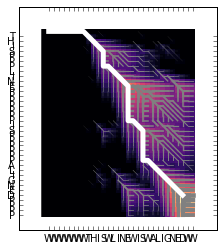

In [31]:
eg1 = 'THISPPPLINEPPPPPPPISPPPPPPALIGNEDPPPP'
eg2 = 'WWWWWWWWTHISWLINEWISWALIGNEDWW'

human_versus_monkey = smithwaterman(eg1,eg2,fulloutput=False)